In [50]:
%pip install missingpy

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 5.9 MB/s eta 0:00:00
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from tqdm import tqdm
import sklearn
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
import pickle
# %pip install xgboost
import xgboost as xgb
import torch

In [191]:
import pandas as pd
import numpy as np
import pickle
#
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#
import seaborn as sns
import plotly.express as px

#
import os
import random
import re
import math
import time

from tqdm import tqdm
from tqdm.keras import TqdmCallback

#from pandas_summary import DataFrameSummary
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.preprocessing import image
import sklearn.neighbors._base
import xgboost as xgb

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

import warnings
from missingpy import MissForest
from PIL import Image

#load torch library
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models

import torch
from torch.utils.data import DataLoader
from torch.utils.mobile_optimizer import optimize_for_mobile
import torch.nn as nn
warnings.filterwarnings('ignore') 
%matplotlib notebook
%matplotlib inline

In [33]:
df = pd.read_csv('./full_data_final_diverse.csv', index_col = 0)

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (7,14,15,16,17,18,19,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:

reds = np.zeros(df.shape[0])
greens = np.zeros(df.shape[0])
blues = np.zeros(df.shape[0])
mean = np.zeros(df.shape[0])
width = np.zeros(df.shape[0], dtype=int)
height = np.zeros(df.shape[0], dtype=int)
for i, path in enumerate(tqdm(df['path'])):
    img = np.array(load_img(path))
    reds[i] = np.mean(img[:,:,0].ravel())
    greens[i] = np.mean(img[:,:,1].ravel())
    blues[i] = np.mean(img[:,:,2].ravel())
    mean[i] = np.mean(img)
    #width[i] = img.shape[1]
    #height[i] = img.shape[0]

df['reds'] = reds
df['greens'] = greens
df['blues'] = blues
df['mean_colors'] = mean
#train['width'] = width
#train['height'] = height
df.head()

100%|██████████| 78262/78262 [2:01:57<00:00, 10.70it/s]  


,image_id,diagnosis,age,sex,localization,source,severity,unaltered_path,F6_path,path,...,split_5,split_6,split_7,split_8,split_9,split_10,reds,greens,blues,mean_colors
0,fissure-2,eczema photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Nail Fungus and other Nai...,/home/ec2-user/SageMaker/teledermatologyAI_cap...,./Data/dermnet/train/Nail Fungus and other Nai...,...,NaN,NaN,NaN,train,test,train,88.914698,64.500998,67.702448,73.706048
1,id-reaction-10,eczema photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Tinea Ringworm Candidiasi...,/home/ec2-user/SageMaker/teledermatologyAI_cap...,/home/ec2-user/SageMaker/teledermatologyAI_cap...,...,NaN,NaN,NaN,train,train,train,66.361009,39.903918,35.622230,47.295719
2,id-reaction-7,eczema photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Tinea Ringworm Candidiasi...,/home/ec2-user/SageMaker/teledermatologyAI_cap...,/home/ec2-user/SageMaker/teledermatologyAI_cap...,...,NaN,NaN,NaN,train,train,val,89.229492,58.007573,43.395189,63.544085
3,fissure-5,eczema photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Nail Fungus and other Nai...,/home/ec2-user/SageMaker/teledermatologyAI_cap...,./Data/dermnet/train/Nail Fungus and other Nai...,...,NaN,NaN,NaN,train,train,train,151.877342,100.357524,93.148373,115.127746
4,id-reaction-1,eczema photos,0.0,unknown,unknown,dermnet,unknown,./Data/dermnet/train/Tinea Ringworm Candidiasi...,/home/ec2-user/SageMaker/teledermatologyAI_cap...,./Data/dermnet/train/Tinea Ringworm Candidiasi...,...,NaN,NaN,NaN,train,train,train,51.371540,48.402850,65.114853,54.963081


In [35]:
# df.to_csv('george_output.csv')

In [77]:
new_df = pd.read_csv('./george_output.csv', index_col = 0)

In [44]:
# first, write to csv, then join './full_data_with_color_data.csv')

# df = df
# color_df = pd.read_csv('./full_data_with_color_data.csv')
# df = df.merge(color_df[['image_id', 'reds', 'greens', 'blues', 'mean_colors']], on='image_id', how="inner")
# df = df[df['duplicate'] == False]
# df.head()

In [171]:
df = new_df

In [90]:
df3_X.columns

Index(['age', 'overlayed', 'split_0', 'split_10', 'reds', 'greens', 'blues',
       'mean_colors', 'missing_anatomy', 'missing_sex', 'missing_age',
       'age_impute_mode', 'age_impute_median', 'age_impute_mean',
       'age_impute_max', 'age_impute_min', 'sex_cat', 'localization_cat',
       'sex_impute_mode_cat', 'anatomy_impute_mode_cat', 'label_0_cat'],
      dtype='object')

In [172]:
df2=df.replace('unknown',np.NaN).replace(0.0, np.NaN).drop(['duplicate', 'source', 'image_id',
                                                            'split_0',
                                                            'label_4', 'label_5', 'label_6', 
                                                            'split_1', 'split_2',
                                                            'split_4', 'split_5', 'split_6', 
                                                            'split_7', 'split_3', 'split_9', 'split_10',
                                                            'diagnosis', 'overlayed', 
                                                            'severity'], axis=1)

In [173]:
# df2=df.replace('unknown',np.NaN).replace(0.0, np.NaN).drop(['duplicate', 'source', 'dataset', 'image_id',
#                                                            'label_1', 'label_2', 'label_3', 'split_1', 'split_2',
#                                                             'split_4', 'split_5', 'split_6', 'diagnosis',
#                                                             'severity'], axis=1)


df2 = df2[df2['split_8'].notna()]
df2 = df2[df2['label_0'].notna()].reset_index().drop(['index'], axis = 1)
#df2['diagnosis'].fillna('unknown', inplace=True)
df2['missing_anatomy'] = df2['localization'].isna().astype(int)
df2['anatomy_impute_mode']=df2['localization'].fillna(df2['localization'].mode()[0])
df2['missing_sex'] = df2['sex'].isna().astype(int)
df2['sex_impute_mode']=df2['sex'].fillna(df2['sex'].mode()[0])
df2['missing_age'] = df2['age'].isna().astype(int)
df2['age_impute_mode']=df2['age'].fillna(df2['age'].mode()[0])
df2['age_impute_median']=df2['age'].fillna(df2['age'].median())
df2['age_impute_mean']=df2['age'].fillna(df2['age'].mean())
df2['age_impute_max']=df2['age'].fillna(df2['age'].max())
df2['age_impute_min']=df2['age'].fillna(df2['age'].min())


path = df2.path
split_8 = df2.split_8
df3 = df2.drop(['path', 'unaltered_path', 'F6_path', 'split_8'], axis =1)
dict_of_dfs = {}
for col in ['sex', 'localization', 'sex_impute_mode', 'anatomy_impute_mode', 'label_0']:
    df = pd.DataFrame()
    df3[col] = df3[col].astype('category')
    df = dict(enumerate(df3[col].cat.categories))
    dict_of_dfs[col] = df 
    df3[col + '_cat'] = df3[col].cat.codes.replace(-1,np.NaN).astype('category')
df3.info()


imputer = MissForest()
#label = df3.label
df3_X = df3.drop(['label_0', 'sex', 'localization', 'sex_impute_mode', 'anatomy_impute_mode'], axis = 1)
cat_cols = [df3_X.columns.get_loc(col) for col in df3_X.select_dtypes(['category']).columns.tolist()]
df3_X_imputed = imputer.fit_transform(df3_X, cat_vars=cat_cols)
df3_X_imputed = pd.DataFrame(df3_X_imputed, columns=df3_X.columns.tolist()).rename(columns={'age': 'age_impute_mf'})
#df3_imputed = pd.concat([df3_X_imputed, label], axis = 1)
#df3_imputed = pd.merge(df3_X_imputed, label, left_index=True, right_index=True)



df3_imputed = df3_X_imputed
cat_cols = df3_imputed.loc[:, df3_imputed.columns.str.endswith("_cat")].columns.to_list()
for col in cat_cols:
    df3_imputed[col] = df3_imputed[col].astype('int')
df3_imputed2 = df3_imputed
for d in list(dict_of_dfs.keys()):
    if d in ['sex_impute_mode', 'anatomy_impute_mode', 'label_0']:
        df3_imputed2[d] = df3_imputed[d + '_cat'].map(dict_of_dfs[d])
        df3_imputed2.drop([d + '_cat'], axis = 1, inplace = True)
    else:
        df3_imputed2[d + '_impute_mf'] = df3_imputed[d + '_cat'].map(dict_of_dfs[d])
        df3_imputed2.drop([d + '_cat'], axis = 1, inplace = True)


dummies = pd.get_dummies(df3_imputed2['sex_impute_mf'], prefix='sex_mf')
df3_imputed2 = pd.concat([df3_imputed2, dummies], axis=1)
dummies = pd.get_dummies(df3_imputed2['localization_impute_mf'], prefix='anatomy_mf')
df3_imputed2 = pd.concat([df3_imputed2, dummies], axis=1)
dummies = pd.get_dummies(df3_imputed2['sex_impute_mode'], prefix='sex_mode')
df3_imputed2 = pd.concat([df3_imputed2, dummies], axis=1)
# dummies = pd.get_dummies(df3_imputed2['sex_impute_research'], prefix='sex_research')
# df3_imputed2 = pd.concat([df3_imputed2, dummies], axis=1)
dummies = pd.get_dummies(df3_imputed2['anatomy_impute_mode'], prefix='anatomy_mode')
df3_imputed2 = pd.concat([df3_imputed2, dummies], axis=1)

# dropping not useful columns
df3_imputed2.drop(['sex_impute_mf', 'localization_impute_mf', 'sex_impute_mode', 'anatomy_impute_mode'],\
                  axis=1, inplace=True)

df3_imputed2.reset_index(drop=True, inplace=True)
path.reset_index(drop=True, inplace=True)

# add path back to the file
df3_imputed2 = pd.concat([df3_imputed2, path], axis=1)
# add path back to the file
df3_imputed2 = pd.concat([df3_imputed2, split_8], axis=1)
df3_imputed2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24066 entries, 0 to 24065
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      12158 non-null  float64 
 1   sex                      12173 non-null  category
 2   localization             11905 non-null  category
 3   label_0                  24066 non-null  category
 4   reds                     24066 non-null  float64 
 5   greens                   24066 non-null  float64 
 6   blues                    24066 non-null  float64 
 7   mean_colors              24066 non-null  float64 
 8   missing_anatomy          24066 non-null  int64   
 9   anatomy_impute_mode      24066 non-null  category
 10  missing_sex              24066 non-null  int64   
 11  sex_impute_mode          24066 non-null  category
 12  missing_age              24066 non-null  int64   
 13  age_impute_mode          24066 non-null  float64 
 14  age_im

,age_impute_mf,reds,greens,blues,mean_colors,missing_anatomy,missing_sex,missing_age,age_impute_mode,age_impute_median,...,anatomy_mode_neck,anatomy_mode_oral/genital,anatomy_mode_palms/soles,anatomy_mode_posterior torso,anatomy_mode_scalp,anatomy_mode_torso,anatomy_mode_trunk,anatomy_mode_upper extremity,path,split_8
0,54.6,88.914698,64.500998,67.702448,73.706048,1.0,1.0,1.0,45.0,55.0,...,0,0,0,0,0,1,0,0,./Data/dermnet/train/Nail Fungus and other Nai...,train
1,54.6,66.361009,39.903918,35.622230,47.295719,1.0,1.0,1.0,45.0,55.0,...,0,0,0,0,0,1,0,0,/home/ec2-user/SageMaker/teledermatologyAI_cap...,train
2,54.6,89.229492,58.007573,43.395189,63.544085,1.0,1.0,1.0,45.0,55.0,...,0,0,0,0,0,1,0,0,/home/ec2-user/SageMaker/teledermatologyAI_cap...,train
3,54.6,151.877342,100.357524,93.148373,115.127746,1.0,1.0,1.0,45.0,55.0,...,0,0,0,0,0,1,0,0,./Data/dermnet/train/Nail Fungus and other Nai...,train
4,54.6,51.371540,48.402850,65.114853,54.963081,1.0,1.0,1.0,45.0,55.0,...,0,0,0,0,0,1,0,0,./Data/dermnet/train/Tinea Ringworm Candidiasi...,train


In [174]:
df3_imputed2.to_csv('./final_inference_data.csv')

In [175]:
df = df3_imputed2

In [211]:
# df.columns
df = pd.read_csv('./final_inference_data.csv', index_col = 0)

In [212]:
df.rename(columns = {'label_0':'label'}, inplace = True)

In [213]:
#create a mapping from labels to a unique integer and vice versa for labelling and prediction later
labels = df['label'].sort_values(ascending=True).unique()
i = 0
idx2class = {} 
class2idx = {}
for tp in labels:
    idx2class[i] = tp
    class2idx[tp] = i
    i += 1
idx2class

{0: 'Benign Marking or Mole',
 1: 'Non-Cancerous Skin Condition',
 2: 'Potentially Malignant Skin Tumors',
 3: 'Toxin, Fungal, Bug, Viral, or Bacterial Infections',
 4: 'Unclassified'}

In [214]:
df['label'] = df['label'].replace(class2idx)
df.head()

,age_impute_mf,reds,greens,blues,mean_colors,missing_anatomy,missing_sex,missing_age,age_impute_mode,age_impute_median,...,anatomy_mode_neck,anatomy_mode_oral/genital,anatomy_mode_palms/soles,anatomy_mode_posterior torso,anatomy_mode_scalp,anatomy_mode_torso,anatomy_mode_trunk,anatomy_mode_upper extremity,path,split_8
0,54.6,88.914698,64.500998,67.702448,73.706048,1.0,1.0,1.0,45.0,55.0,...,0,0,0,0,0,1,0,0,./Data/dermnet/train/Nail Fungus and other Nai...,train
1,54.6,66.361009,39.903918,35.622230,47.295719,1.0,1.0,1.0,45.0,55.0,...,0,0,0,0,0,1,0,0,/home/ec2-user/SageMaker/teledermatologyAI_cap...,train
2,54.6,89.229492,58.007573,43.395189,63.544085,1.0,1.0,1.0,45.0,55.0,...,0,0,0,0,0,1,0,0,/home/ec2-user/SageMaker/teledermatologyAI_cap...,train
3,54.6,151.877342,100.357524,93.148373,115.127746,1.0,1.0,1.0,45.0,55.0,...,0,0,0,0,0,1,0,0,./Data/dermnet/train/Nail Fungus and other Nai...,train
4,54.6,51.371540,48.402850,65.114853,54.963081,1.0,1.0,1.0,45.0,55.0,...,0,0,0,0,0,1,0,0,./Data/dermnet/train/Tinea Ringworm Candidiasi...,train


In [215]:
train = df[~df['split_8'].isin(['test', 'val'])]
val = df[df['split_8'].isin(['val'])]
test = df[df['split_8'].isin(['test'])]
train.shape

(18072, 60)

In [216]:
X_meta_train = train.drop(['label', 'split_8', 'path'], axis=1).reset_index().drop('index', axis = 1)
X_img_train = train.path.reset_index().drop('index', axis = 1)
y_train = train.label.reset_index().drop('index', axis = 1)

X_meta_val = val.drop(['label', 'split_8', 'path'], axis=1).reset_index().drop('index', axis = 1)
X_img_val = val.path.reset_index().drop('index', axis = 1)
y_val = val.label.reset_index().drop('index', axis = 1)

X_meta_test = test.drop(['label', 'split_8', 'path'], axis=1).reset_index().drop('index', axis = 1)
X_img_test = test.path.reset_index().drop('index', axis = 1)
y_test = test.label.reset_index().drop('index', axis = 1)

In [217]:
# meta_mod1 = pickle.load(open('model/finalized_meta.sav', 'rb'))
meta_mod1 = xgb.XGBClassifier()
meta_mod1.load_model('./model/finalized_meta_mod.json')

In [218]:
img_mod1 = torch.load(f'model/gridsearch5/resnet_50e_SGD_split_8_diverse_GS500.pt', map_location=torch.device('cpu'))
img_mod2 = torch.load(f'model/gridsearch5/resnet_50e_SGD_split_9_diverse_GS501.pt', map_location=torch.device('cpu'))
img_mod3 = torch.load(f'model/gridsearch5/resnet_50e_SGD_split_10_diverse_GS502.pt', map_location=torch.device('cpu'))
# img_mod4 = torch.load(f'model/gridsearch5/resnet_50e_SGD_split_9_diverse_GS503.pt', map_location=torch.device('cpu'))
# img_mod5 = torch.load(f'model/gridsearch5/resnet_50e_SGD_split_9_diverse_GS504.pt', map_location=torch.device('cpu'))
# img_mod6 = torch.load(f'model/gridsearch5/resnet_50e_SGD_split_9_diverse_GS505.pt', map_location=torch.device('cpu'))




# img_mod2 = torch.load(f'model/merged_resnet50.pt', map_location=torch.device('cpu'))
# img_mod3 = torch.load(f'model/vgg_15e_SGD_GS19.pt', map_location=torch.device('cpu'))
# img_mod4 = torch.load(f'model/vgg_20e_SGD_GS28.pt', map_location=torch.device('cpu'))
# img_mod5 = torch.load(f'model/resnet_10e_SGD_GS9.pt', map_location=torch.device('cpu'))
# img_mod6 = torch.load(f'model/resnet_50e_SGD_GS97.pt', map_location=torch.device('cpu'))
# img_mod7 = torch.load(f'model/resnet_15e_SGD_GS18.pt', map_location=torch.device('cpu'))
# img_mod8 = torch.load(f'model/resnet_50e_Adam_GS105.pt', map_location=torch.device('cpu'))
# img_mod9 = torch.load(f'model/resnet_20e_SGD_GS27.pt', map_location=torch.device('cpu'))

In [219]:
meta_mods = [meta_mod1]
img_mods = [img_mod1,img_mod2,img_mod3]

In [220]:
def image_predict(model, image_paths):
    
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
        mean=[0.676, 0.542, 0.519],
        std=[0.290, 0.226, 0.237]
    )])

    model.eval()
    
    y_pred = []
    for file_name in image_paths.iloc[:,0]:
        image = Image.open(file_name).convert('RGB')
        # Pass the image for preprocessing and the image preprocessed
        img_preprocessed = preprocess(image)
        # Reshape, crop, and normalize the input tensor for feeding into network for evaluation
        batch_img_tensor = torch.unsqueeze(img_preprocessed, 0)

        output = model(batch_img_tensor)
        predicted = torch.argmax(output,-1).cpu().numpy()  
        
        y_pred.append(predicted)
    y_pred = np.array(y_pred)
    
    return y_pred

In [205]:
# i = 1
# for img_mod in img_mods:
#     y_pred = image_predict(img_mod, X_img_test)
#     print("image model {0} accuracy:".format(str(i)), accuracy_score(y_test, y_pred))
#     i += 1

In [221]:
img_mods = [img_mod1,img_mod2,img_mod3]


In [222]:
def ensemble_data_generator(meta_mods = None, img_mods = None, X_meta_data = None, image_paths = None):
    
    all_y_pred = None
    
    if meta_mods is not None and X_meta_data is not None:
        i = 1
        for meta_mod in meta_mods:
            y_meta_pred = meta_mod.predict(X_meta_data)
            if all_y_pred is None:
                all_y_pred = y_meta_pred
            else:
                all_y_pred = np.column_stack((all_y_pred, y_meta_pred))
            i += 1
            
    if img_mods is not None and image_paths is not None:
        j = 1
        for img_mod in img_mods:
            y_img_pred = image_predict(img_mod, image_paths)[:,0]
            if all_y_pred is None:
                all_y_pred = y_img_pred
            else:
                all_y_pred = np.column_stack((all_y_pred, y_img_pred))
            j += 1

    col1 = ["meta_mod" + str(i) for i in range(1, i)]
    col2 = ["img_mod" + str(i) for i in range(1, j)]
    col3 = col1 + col2
    all_y_pred = pd.DataFrame(all_y_pred, columns = col3)
    
    return all_y_pred


In [223]:
train_df = ensemble_data_generator(meta_mods = meta_mods, img_mods = img_mods, X_meta_data = X_meta_val, image_paths = X_img_val)
train_df.head()

,meta_mod1,img_mod1,img_mod2,img_mod3
0,1,1,1,1
1,1,1,3,1
2,1,4,1,1
3,1,3,3,3
4,1,3,3,1


In [224]:
X = train_df # only using validation data here
y = y_val
# taking holdout set for validating with stratified y

X_train, X_holdout, y_train, y_holdout = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# 5 fold stratify for cv
cv = StratifiedKFold(5, shuffle=True, random_state=42)

In [226]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb_f = XGBClassifier(
    n_estimators=750,
    min_child_weight=0.16,
    learning_rate=0.033,
    max_depth=1,
    subsample=0.80,
    colsample_bytree=0.4,
    gamma=0.28,
    random_state=42,
    n_jobs=-1,
    objective='multi:softmax',
    nthread=4
)
xgb_f.fit(X_train, y_train)

# predicting on holdout set
y_pred = xgb_f.predict(X_holdout)

# checking results on test set
accuracy_score(y_holdout, y_pred)

0.8868715083798883

In [229]:
xgb_f.fit(X, y)
import pickle
model = xgb_f
filename = 'learner.sav'
# pickle.dump(model, open(filename, 'wb'))

In [230]:
# learner_mod = pickle.load(open('finalized_learner.sav', 'rb'))
learner_mod = model

In [231]:
def ensemble_predict(meta_mods, img_mods, X_meta_data, image_paths, learner_mod):
    
    ensemble_X = ensemble_data_generator(meta_mods, img_mods, X_meta_data, image_paths)
            
    ensemble_pred = learner_mod.predict(ensemble_X)
    
    return ensemble_pred

In [232]:
ensemble_pred = ensemble_predict(meta_mods, img_mods, X_meta_test, X_img_test, learner_mod)
accuracy_score(y_test, ensemble_pred)

0.8444995864350703

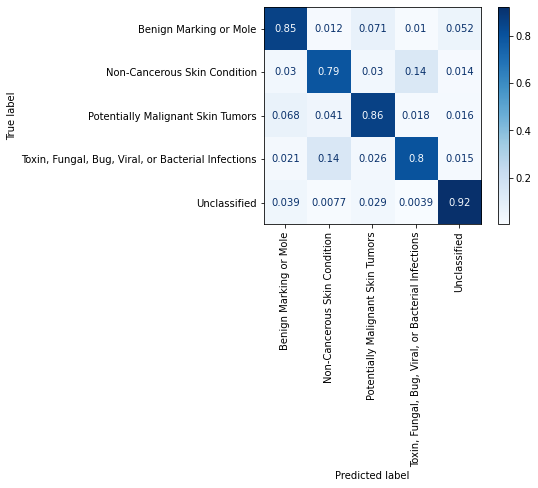

In [233]:
ConfusionMatrixDisplay.from_predictions(ensemble_pred, y_test, display_labels=[i for i in idx2class.values()], 
                                        xticks_rotation = "vertical", cmap='Blues' , normalize = "true")
plt.show()

In [234]:
model.save_model('learner.json')

In [235]:
pickle.dump(model, open(filename, 'wb'))